# Combination of all 4 binary sobel filters masks

In this challenge all 4 previously calculated binary masks are combined to find likely lane lines

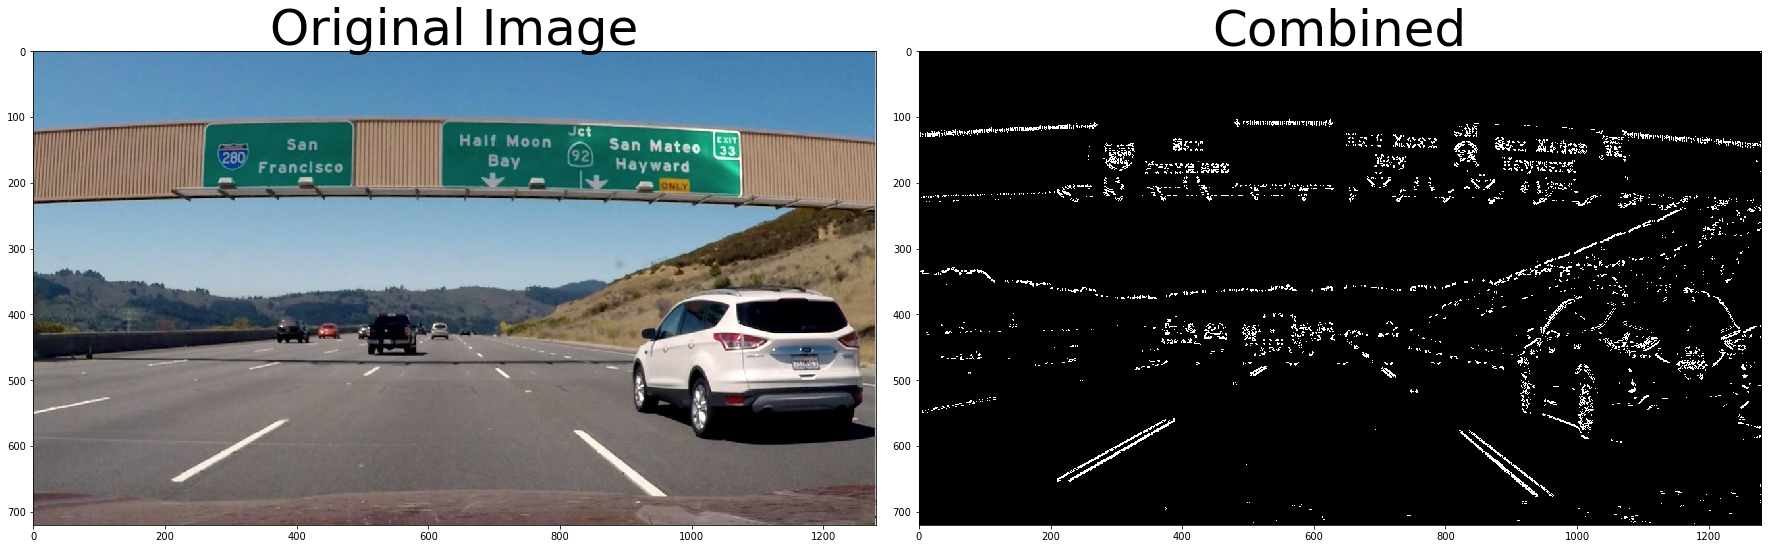

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image and grayscale it
image = mpimg.imread('data/signs_vehicles_xygrad.png')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    x_dir = 1 if orient=='x' else 0
    y_dir = 1 if orient=='y' else 0
    sobel = cv2.Sobel(img, cv2.CV_64F, x_dir, y_dir)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # get maximum value of array for scaling
    max_val = np.max(abs_sobel)
    # scale to 0..255 range
    scaled_sobel = np.uint8(255*abs_sobel/max_val)
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    return binary_output

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_x = np.abs(sobel_x)
    abs_y = np.abs(sobel_y)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    sob_dir = np.arctan2(abs_y, abs_x)
    # 5) Create a binary mask where direction thresholds are met    
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(sob_dir)
    binary_output[(sob_dir>=thresh[0]) & (sob_dir<=thresh[1])] = 1
    return binary_output

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    # 3) Calculate the magnitude 
    # abs_sobelxy = \sqrt{(sobel_x)^2+(sobel_y)^2}    
    abs_sobelxy = np.sqrt(sobel_x**2 + sobel_y**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    eight_bit = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(abs_sobelxy)
    binary_output[(eight_bit >= mag_thresh[0]) & (eight_bit <= mag_thresh[1])] = 1
    return binary_output
    
# Get x and y binary
gradx = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
grady = abs_sobel_thresh(image, orient='y', thresh_min=20, thresh_max=100)
# Get direction binary
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Get the magnitude
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))
    
comb_binary = np.zeros_like(dir_binary)
comb_binary[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(comb_binary, cmap='gray')
ax2.set_title('Combined', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)